In [4]:
# Import data and libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline

files = glob.glob('./data/*[tT].csv')
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
meta0 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

#files = glob.glob('./data/*[tT].csv')
files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames)
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

In [4]:
#eliminate flipped data 
flipped1 = np.where(tempDF['June 11 2015 05'].values < 18)[1]
unflipped = np.setdiff1d(tempDF.columns.values, tempDF.columns[flipped1])
tempDF = tempDF[unflipped]

meta = meta.loc[np.intersect1d(tempDF.columns.values, meta.sensornumber.values)]

anomaly = tempDF - np.tile(tempDF.mean(axis=1)[:,np.newaxis], (1, tempDF.shape[1])) # the anomaly data
anomalyDF = pd.DataFrame(anomaly, tempDF.index, tempDF.columns)

In [16]:
# Import any observation data
date_spec = {'Date': [ 2]}
observations = pd.read_csv('data/sciencecenterobservations.csv', sep = ',', parse_dates = date_spec, keep_date_col=True, index_col=0)
observations.TMAX = observations.TMAX/10. 
observations.index = observations.index + pd.DateOffset(hours = 16)

observations2 = pd.read_csv('data/sciencecenterobservations.csv', sep = ',', parse_dates = date_spec, keep_date_col=True, index_col=0)
observations2.index = observations2.index + pd.DateOffset(hours = 6)
observations2.TMIN = observations2.TMIN/10. 

urban = observations.TMAX.combine_first(observations2.TMIN)

observations = pd.read_csv('data/bwiobservations.csv', sep = ',', parse_dates = date_spec, keep_date_col=True, index_col=0)
observations.TMAX = observations.TMAX/10. 
observations.index = observations.index + pd.DateOffset(hours = 16)

observations2 = pd.read_csv('data/bwiobservations.csv', sep = ',', parse_dates = date_spec, keep_date_col=True, index_col=0)
observations2.index = observations2.index + pd.DateOffset(hours = 6)
observations2.TMIN = observations2.TMIN/10. 

rural = observations.TMAX.combine_first(observations2.TMIN)
observations = pd.DataFrame(data = [urban, rural], index = ['urban', 'rural']).T
#observations.rename(columns = ('u', 'r'))
#observations.rural

In [21]:
date_spec = {'Date': [2]}
df = pd.read_csv('./data/observations/rural/4330976847362dat.csv', sep = ',', parse_dates = date_spec, keep_date_col=True).set_index('Date')
df.TEMP[df.TEMP == '****'] = 'NaN' # replace stars with nans
df.TEMP = (df.TEMP.astype('float')-32)*5/9. #change the data to float
df.TEMP[df.TEMP > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
df = df[~((df.index.month == 2) & (df.index.day == 29))] # get rid of leap years

df.DEWP[df.DEWP == '****'] = 'NaN' # replace stars with nans
df.DEWP = df.DEWP.astype('float') #change the data to float
#df.TEMP[df.TEMP > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high

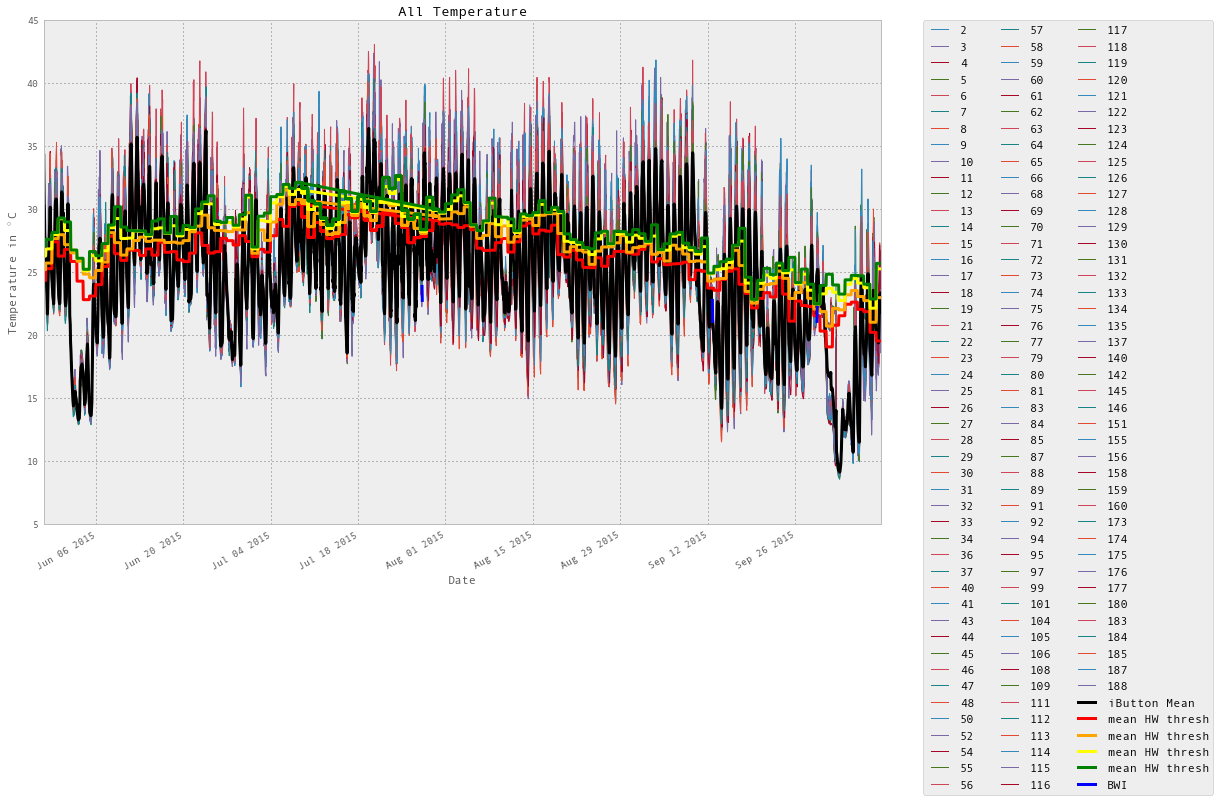

In [23]:
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.index, tempDF[column], label= column)

tempDF.mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)
#observations.urban.plot(style = 'or', label = 'Sci. Center', linewidth = 3, markersize = 8)
#observations.rural.plot(style = 'ob', label = 'BWI', linewidth = 3, markersize = 8)

meanthresh = (np.load('BWImeandailytempthresholds.npy') -32) *5/9.
plt.plot(tempDF.index, meanthresh[0][tempDF.index.dayofyear-1], color = 'r', linewidth = 3, label = 'mean HW thresh')
plt.plot(tempDF.index, meanthresh[1][tempDF.index.dayofyear-1], color = 'orange', linewidth = 3, label = 'mean HW thresh')
plt.plot(tempDF.index, meanthresh[2][tempDF.index.dayofyear-1], color = 'yellow', linewidth = 3, label = 'mean HW thresh')
plt.plot(tempDF.index, meanthresh[3][tempDF.index.dayofyear-1], color = 'green', linewidth = 3, label = 'mean HW thresh')
df.TEMP[tempDF.index].plot(label = 'BWI', linewidth = 3, color = 'blue')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.title('All Temperature')
plt.ylabel('Temperature in $^\circ $C')

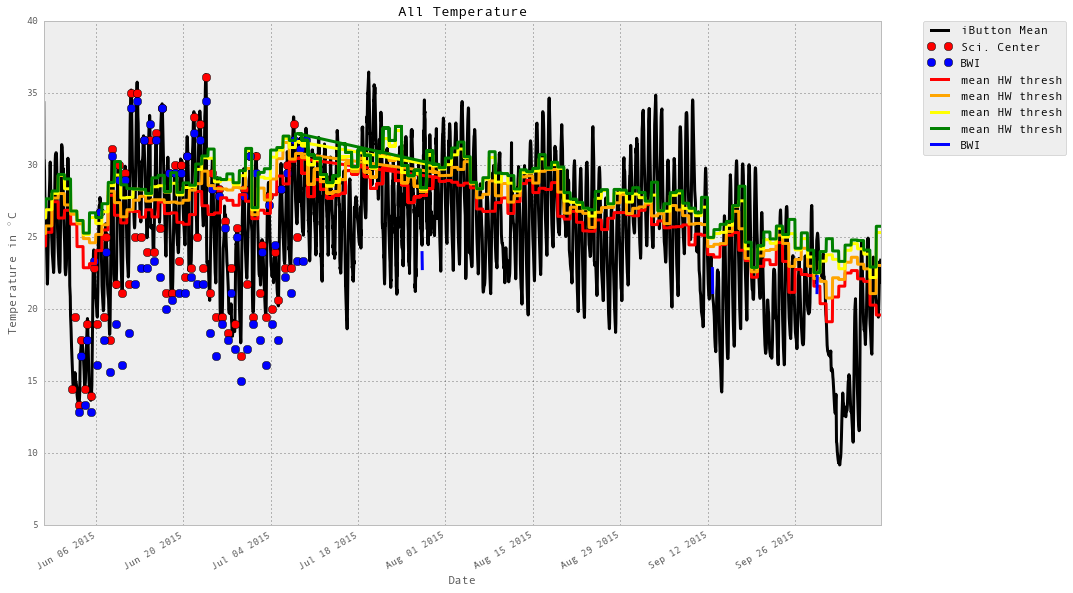

In [28]:
fig = plt.figure(figsize=[15,10])
tempDF.mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)
observations.urban.plot(style = 'or', label = 'Sci. Center', linewidth = 3, markersize = 8)
observations.rural.plot(style = 'ob', label = 'BWI', linewidth = 3, markersize = 8)

meanthresh = (np.load('BWImeandailytempthresholds.npy') -32) *5/9.
plt.plot(tempDF.index, meanthresh[0][tempDF.index.dayofyear-1], color = 'r', linewidth = 3, label = 'mean HW thresh')
plt.plot(tempDF.index, meanthresh[1][tempDF.index.dayofyear-1], color = 'orange', linewidth = 3, label = 'mean HW thresh')
plt.plot(tempDF.index, meanthresh[2][tempDF.index.dayofyear-1], color = 'yellow', linewidth = 3, label = 'mean HW thresh')
plt.plot(tempDF.index, meanthresh[3][tempDF.index.dayofyear-1], color = 'green', linewidth = 3, label = 'mean HW thresh')
df.TEMP[tempDF.index].plot(label = 'BWI', linewidth = 3, color = 'blue')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('All Temperature')
plt.ylabel('Temperature in $^\circ $C')

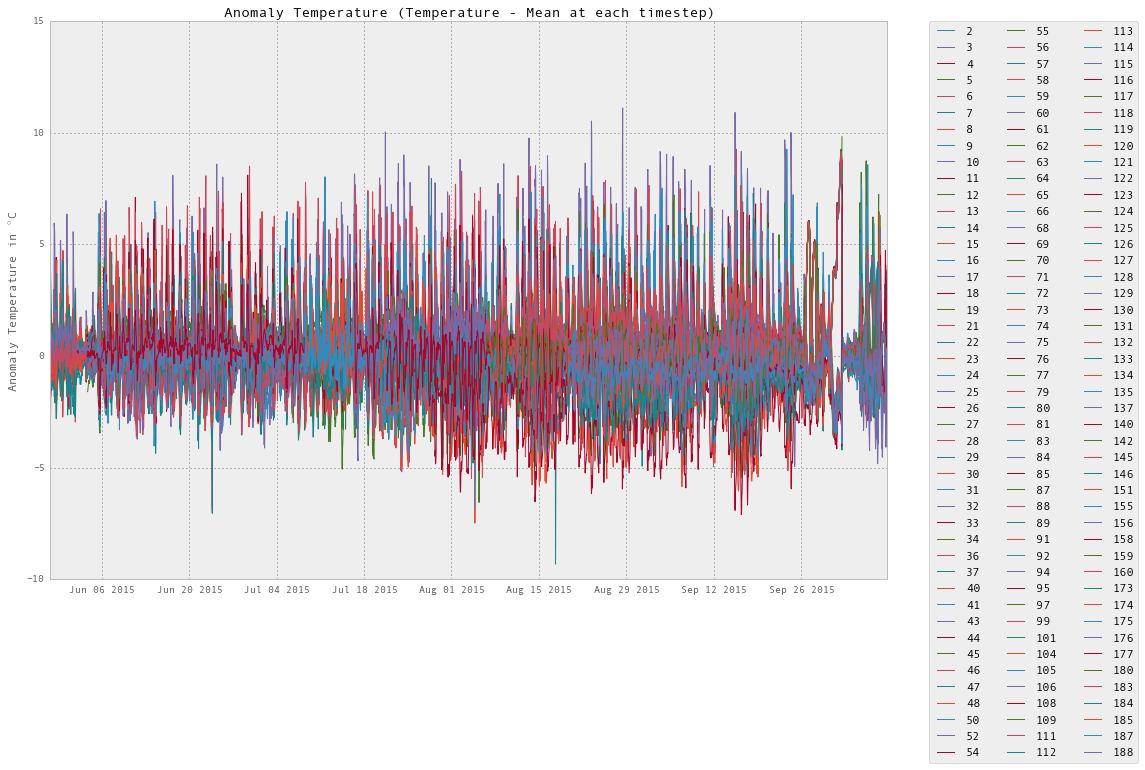

In [142]:
# plot anomaly 
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(anomalyDF.index, anomalyDF[column], label= column)
#anomalyDF.std(axis=1).plot(style = 'black', alpha = .5, linewidth = 3, label = '+$sigma$')
#(anomalyDF.std(axis=1)*-1).plot(style = 'black', alpha = .5, linewidth = 3, label = '- $\sigma$')
#observations.urban.subtract(observations.rural).plot(style = 'or', label = 'U-R', markersize = 8)

plt.title('Anomaly Temperature (Temperature - Mean at each timestep)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.ylabel('Anomaly Temperature in $^\circ $C')

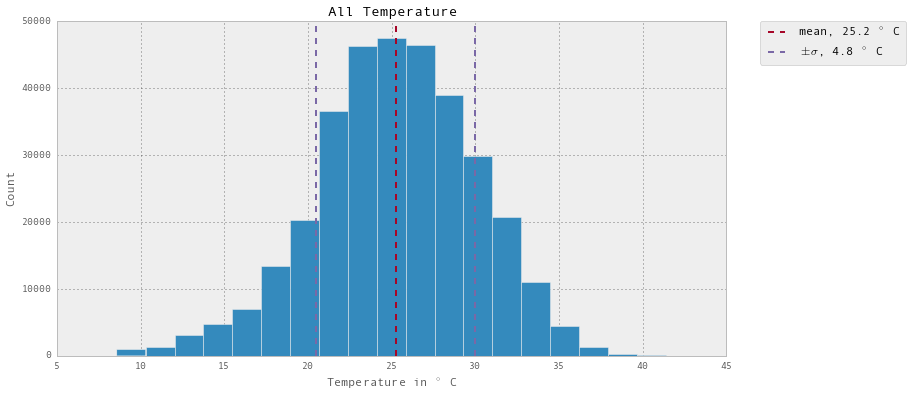

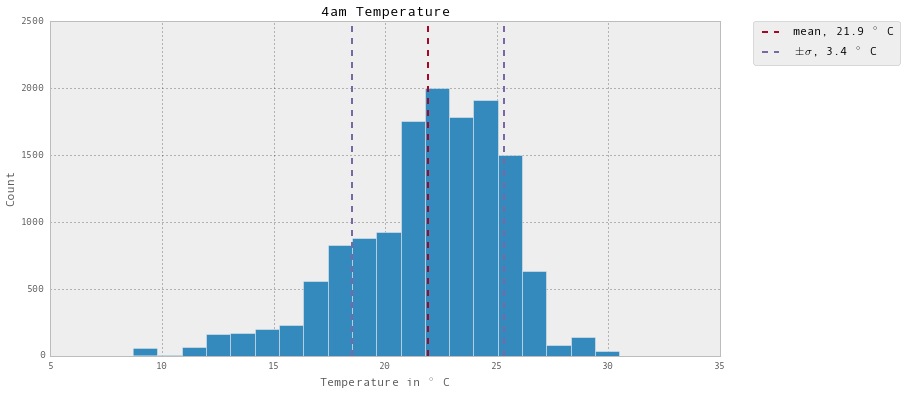

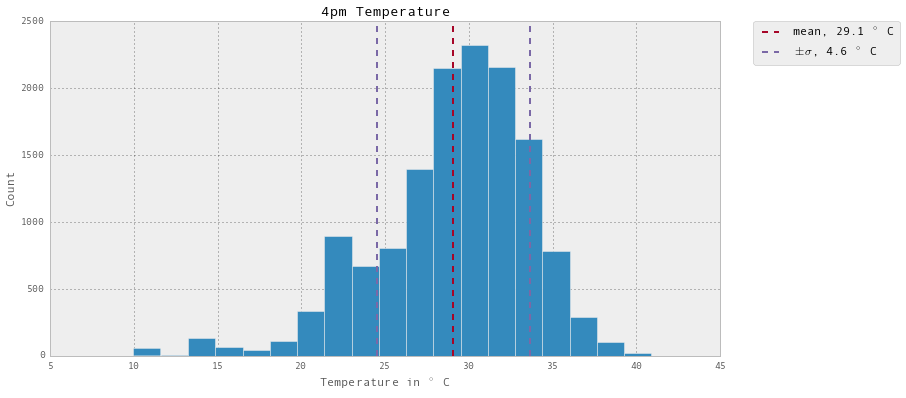

In [105]:
ibuttonplots.histPlot(tempDF, 'All Temperature')
h1, bins1 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 4], '4am Temperature')
h2, bins2 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 16], '4pm Temperature')

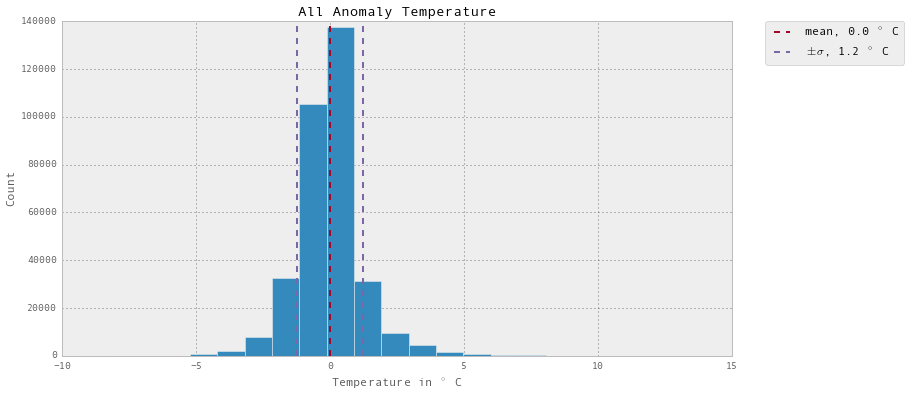

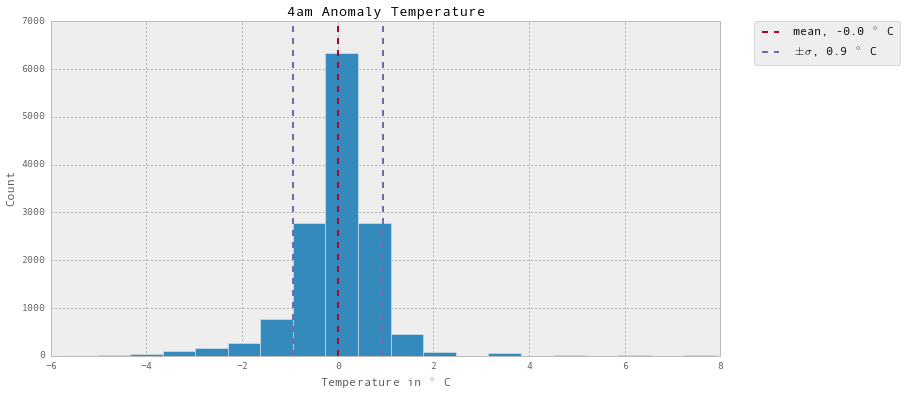

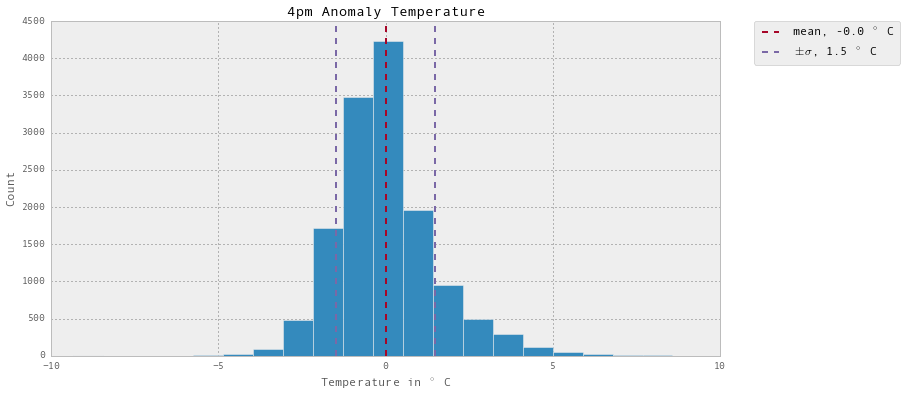

In [115]:
ibuttonplots.histPlot(anomalyDF, 'All Anomaly Temperature')
h1, bins1 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 4], '4am Anomaly Temperature')
h2, bins2 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 16], '4pm Anomaly Temperature')

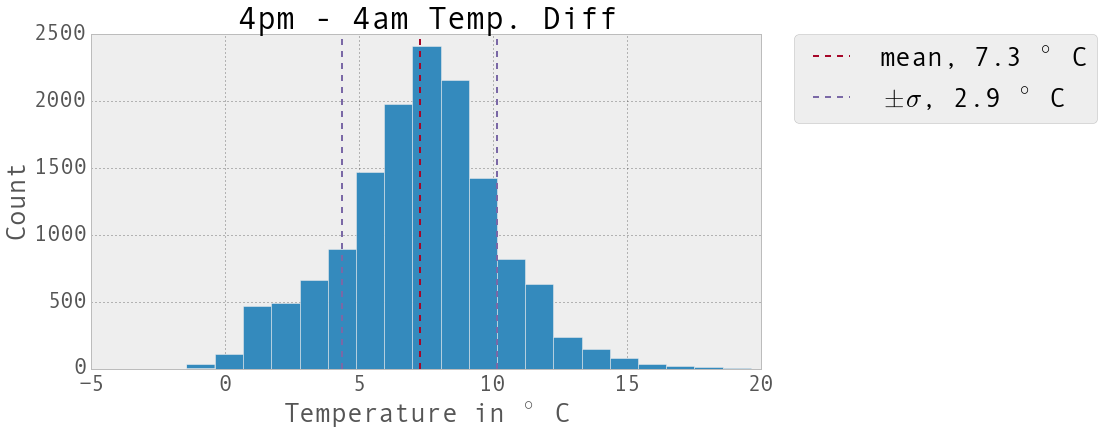

In [101]:
fig  = plt.figure(figsize=(12, 6))
diff = tempDF[tempDF.index.hour == 16][:-1].values - tempDF[tempDF.index.hour == 4].values
data = diff[~np.isnan(diff)]
n, bins, patches = plt.hist(data, 20)

plt.axvline(data.mean(),
                linestyle='dashed',
                color = pd.tools.plotting._get_standard_colors(3)[2],
                linewidth=2,
                label = 'mean, %2.1f $^\circ$ C'%np.nanmean(data),
                alpha = 1.0)

plt.axvline(data.std()+data.mean(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                label = '$\pm \sigma$, %2.1f $^\circ$ C'%np.nanstd(data)
                )

plt.axvline(data.mean()-data.std(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #, ncol = 3)

plt.title('4pm - 4am Temp. Diff')
plt.xlabel('Temperature in $^\circ$ C')
plt.ylabel('Count')

In [124]:
tempDF['2015-06-18 16:00:00'].mean().mean(), tempDF['2015-06-19 16:00:00'].mean().mean(), tempDF['2015-06-23 16:00:00'].mean().mean()

(28.033989473684212, 29.898663157894731, 36.212210526315786)

(array([  1.,   2.,   2.,   5.,   5.,   3.,   5.,   7.,   9.,  16.,   3.,
          7.,   8.,   5.,   7.,   5.,   0.,   2.,   1.,   2.]),
 array([ 32.872  ,  33.21475,  33.5575 ,  33.90025,  34.243  ,  34.58575,
         34.9285 ,  35.27125,  35.614  ,  35.95675,  36.2995 ,  36.64225,
         36.985  ,  37.32775,  37.6705 ,  38.01325,  38.356  ,  38.69875,
         39.0415 ,  39.38425,  39.727  ]))

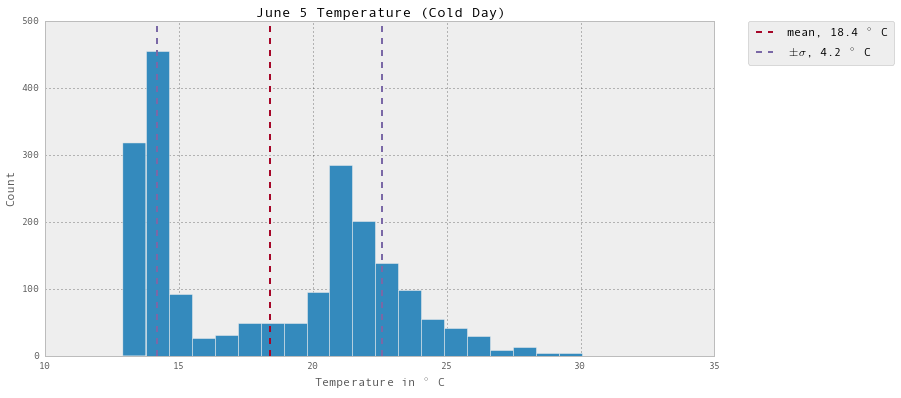

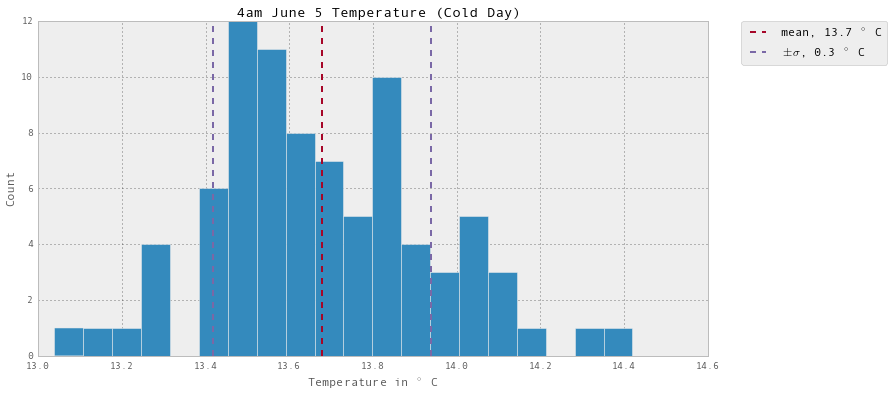

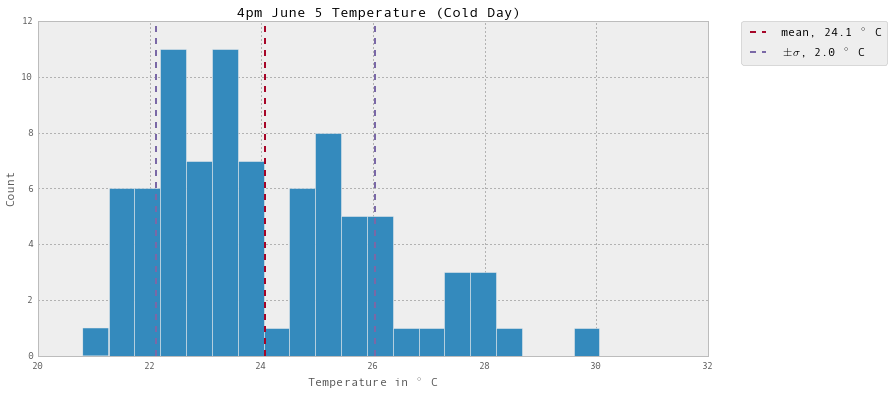

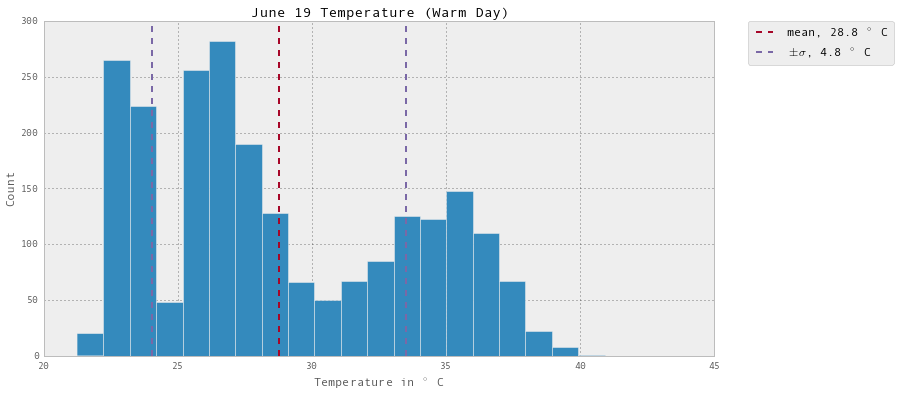

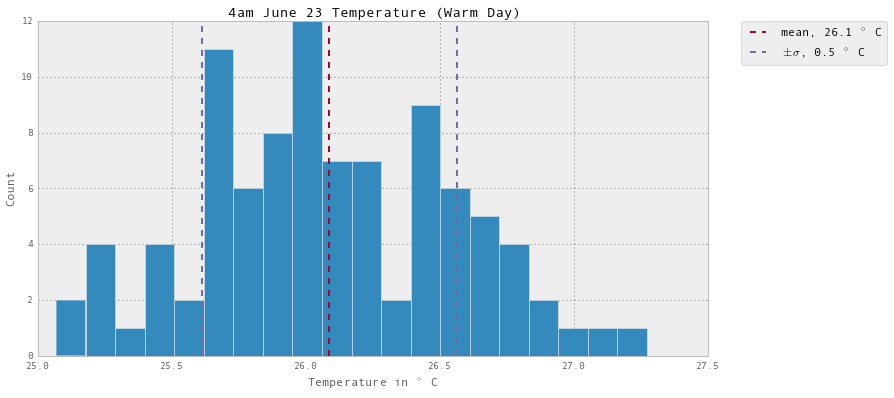

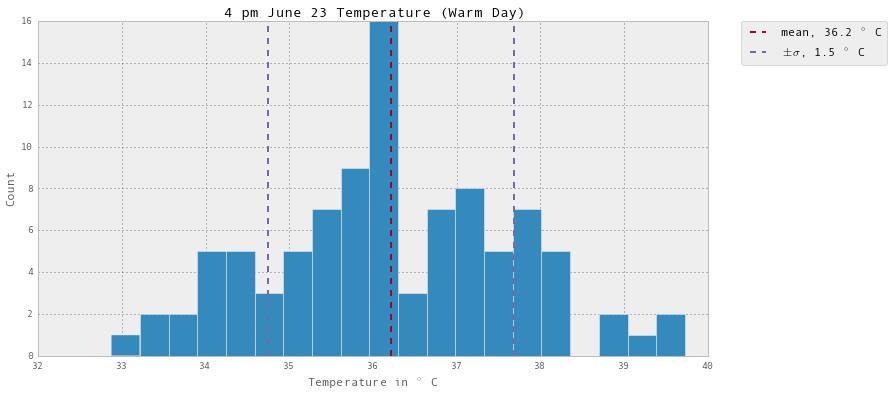

In [125]:
ibuttonplots.histPlot(tempDF['2015-06-05'], 'June 5 Temperature (Cold Day)')
ibuttonplots.histPlot(tempDF['2015-06-05 04:00:00'], ' 4am June 5 Temperature (Cold Day)')
ibuttonplots.histPlot(tempDF['2015-06-05 16:00:00'], ' 4pm June 5 Temperature (Cold Day)')

ibuttonplots.histPlot(tempDF['2015-06-23'], 'June 19 Temperature (Warm Day)')
ibuttonplots.histPlot(tempDF['2015-06-23 04:00:00'], '4am June 23 Temperature (Warm Day)')
ibuttonplots.histPlot(tempDF['2015-06-23 16:00:00'], '4 pm June 23 Temperature (Warm Day)')

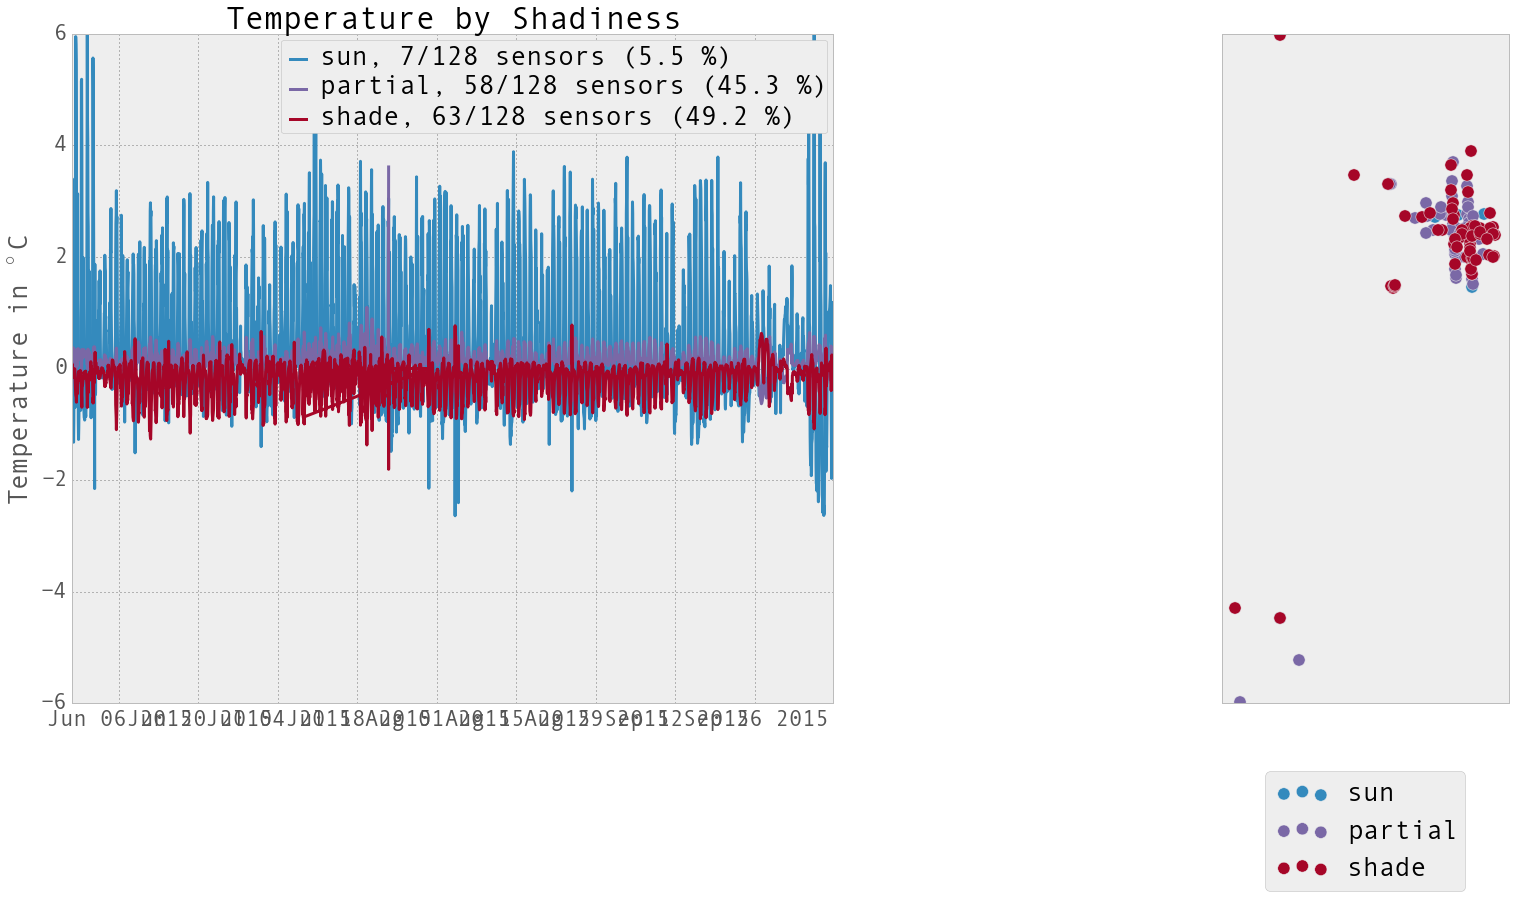

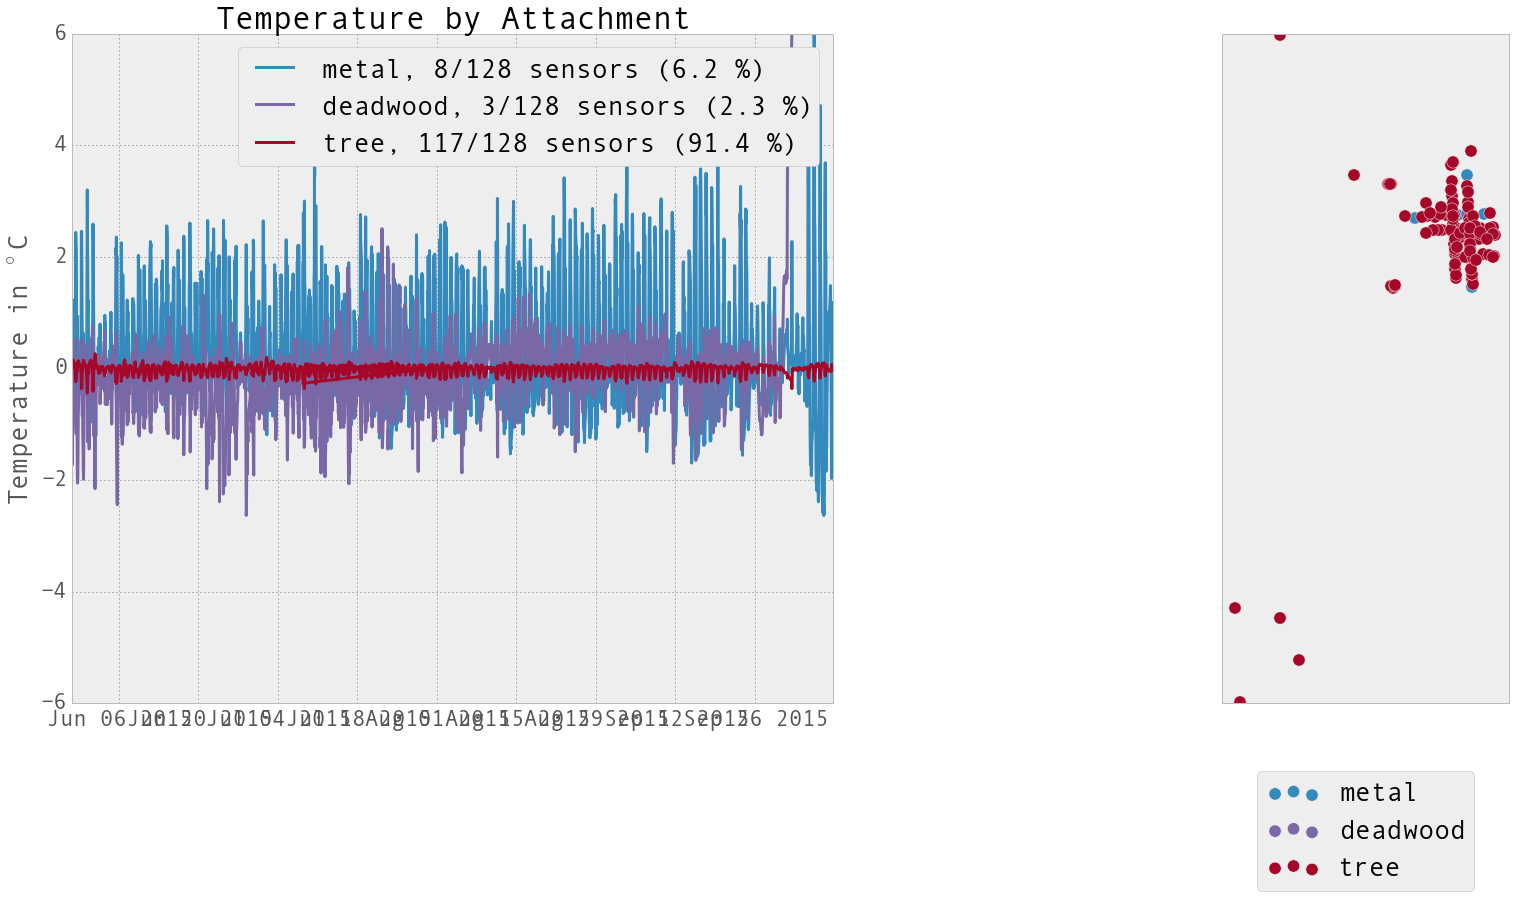

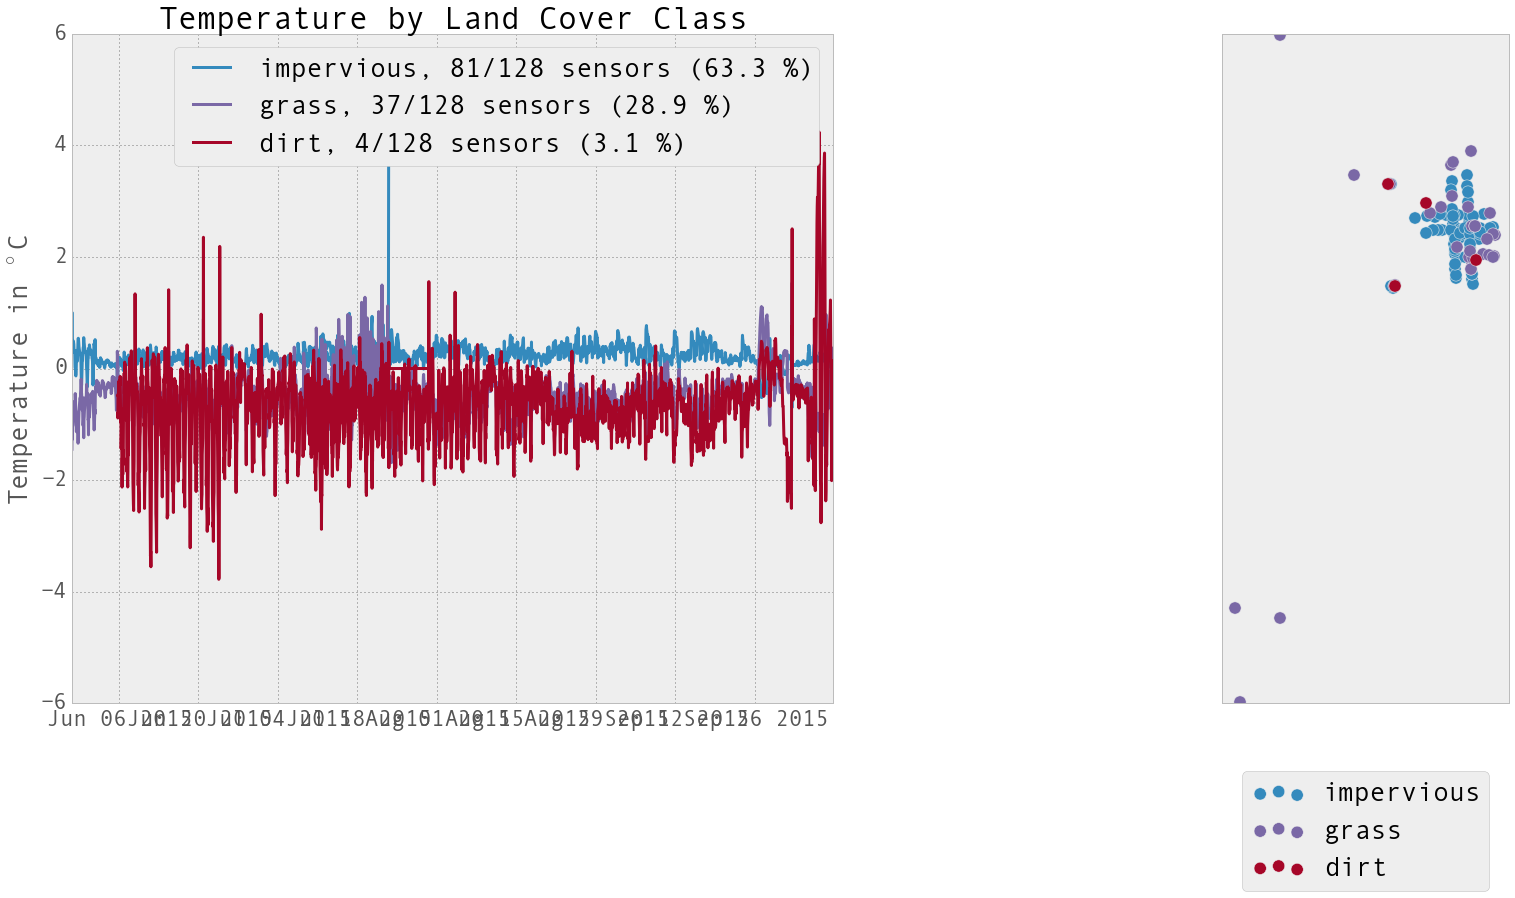

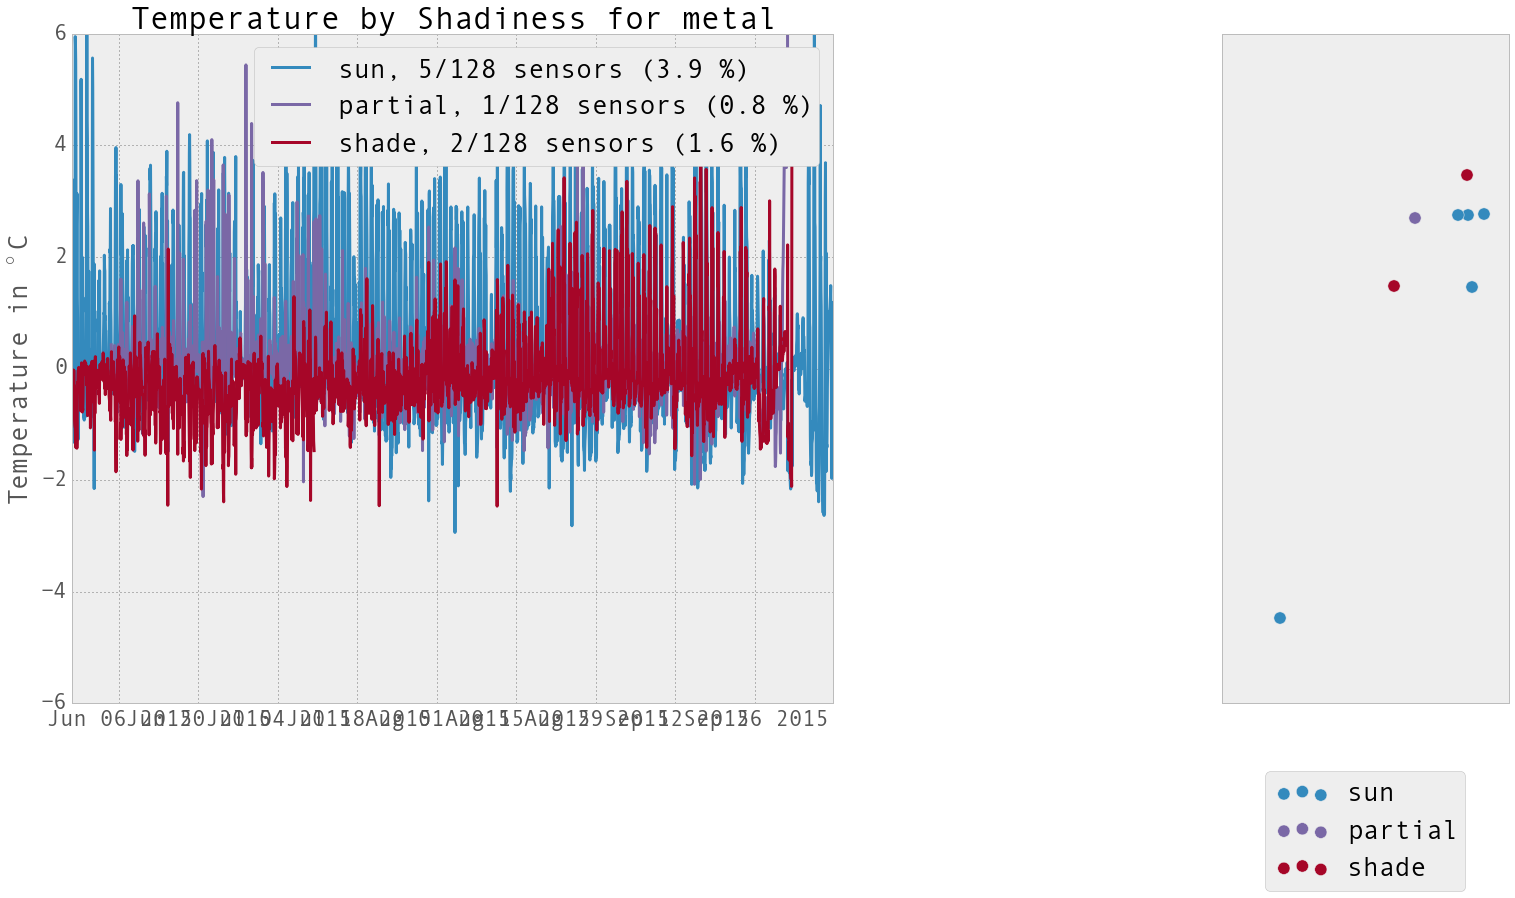

In [144]:
for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.timeseriesplots(anomalyDF,meta,option)
    #plt.savefig('diurnal%s.eps'%option, format = 'eps', dpi = 600)
ibuttonplots.timeseriesplots(anomalyDF, meta,'sunorshade', 'attachment', 'metal')

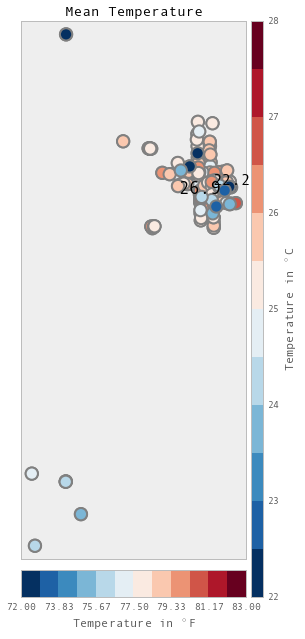

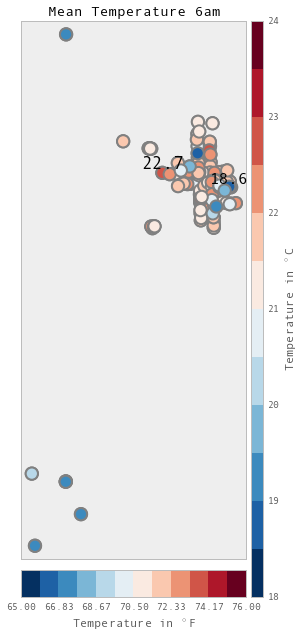

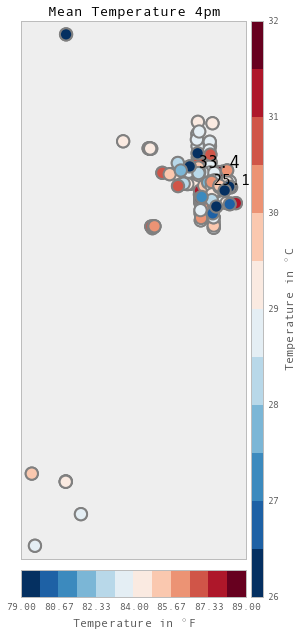

In [50]:
ibuttonplots.mapmean(tempDF, meta)
ibuttonplots.mapmean(tempDF[tempDF.index.hour == 6], meta, '6am')
ibuttonplots.mapmean(tempDF[tempDF.index.hour == 16], meta, '4pm')

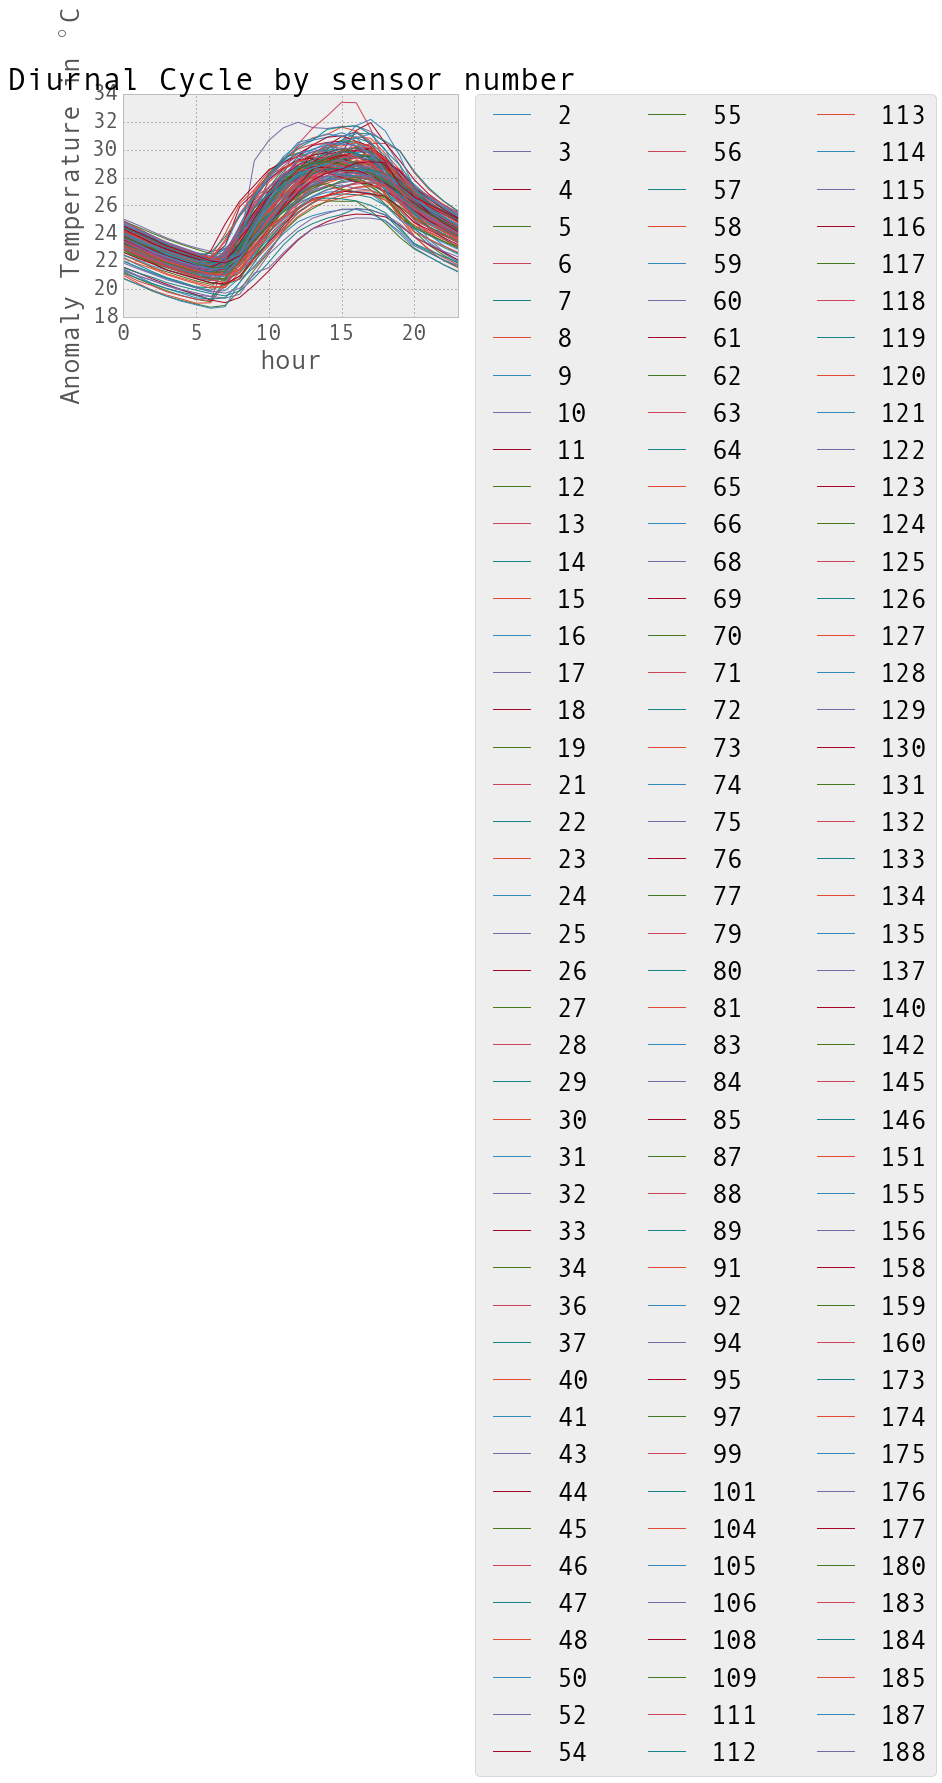

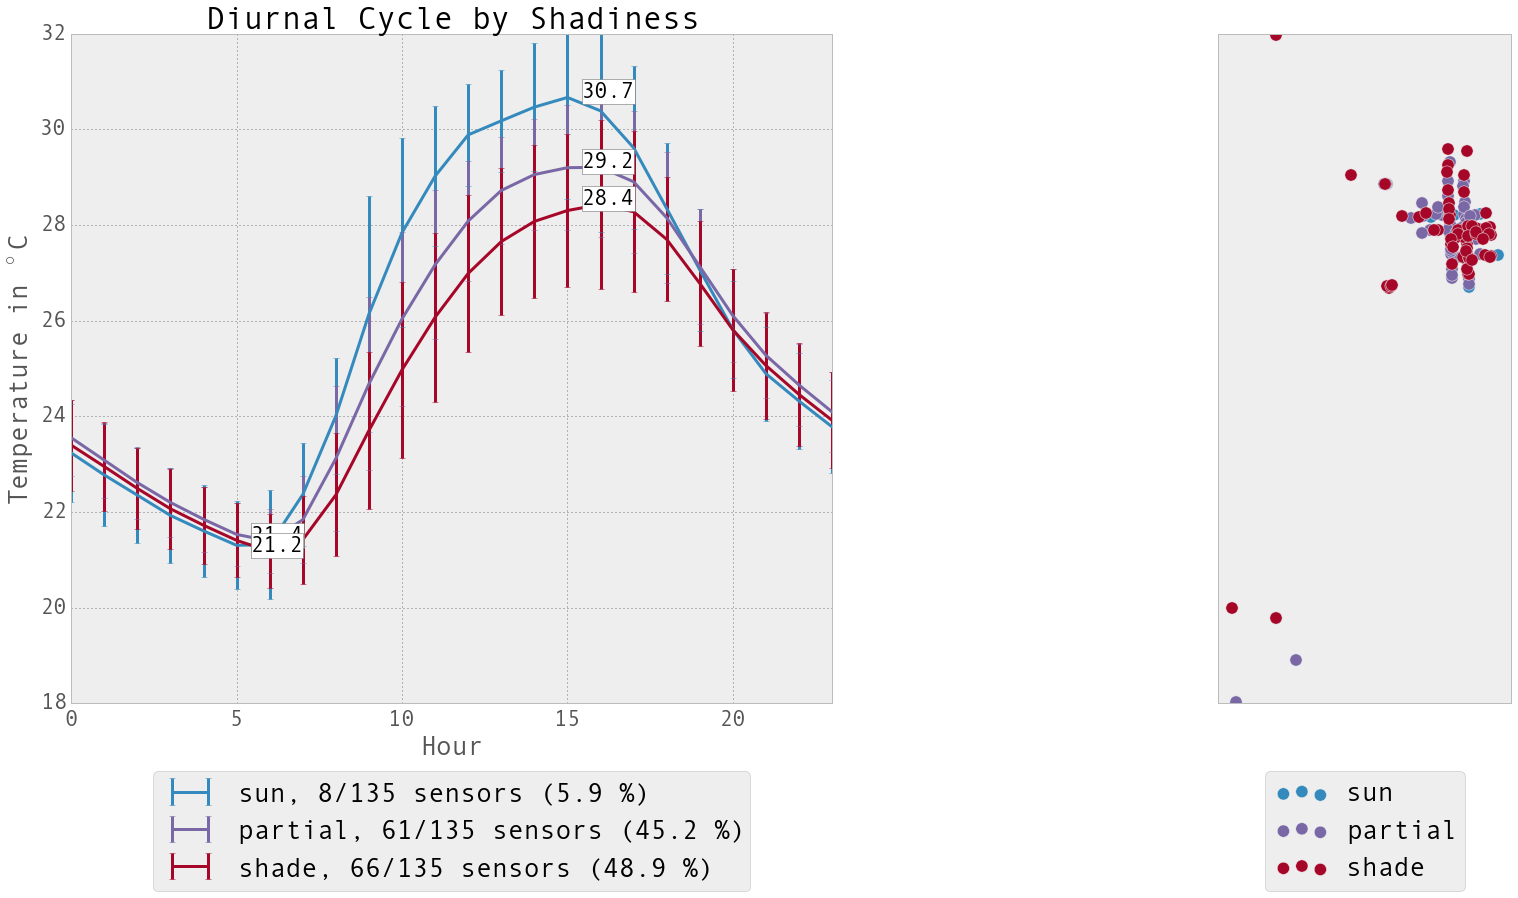

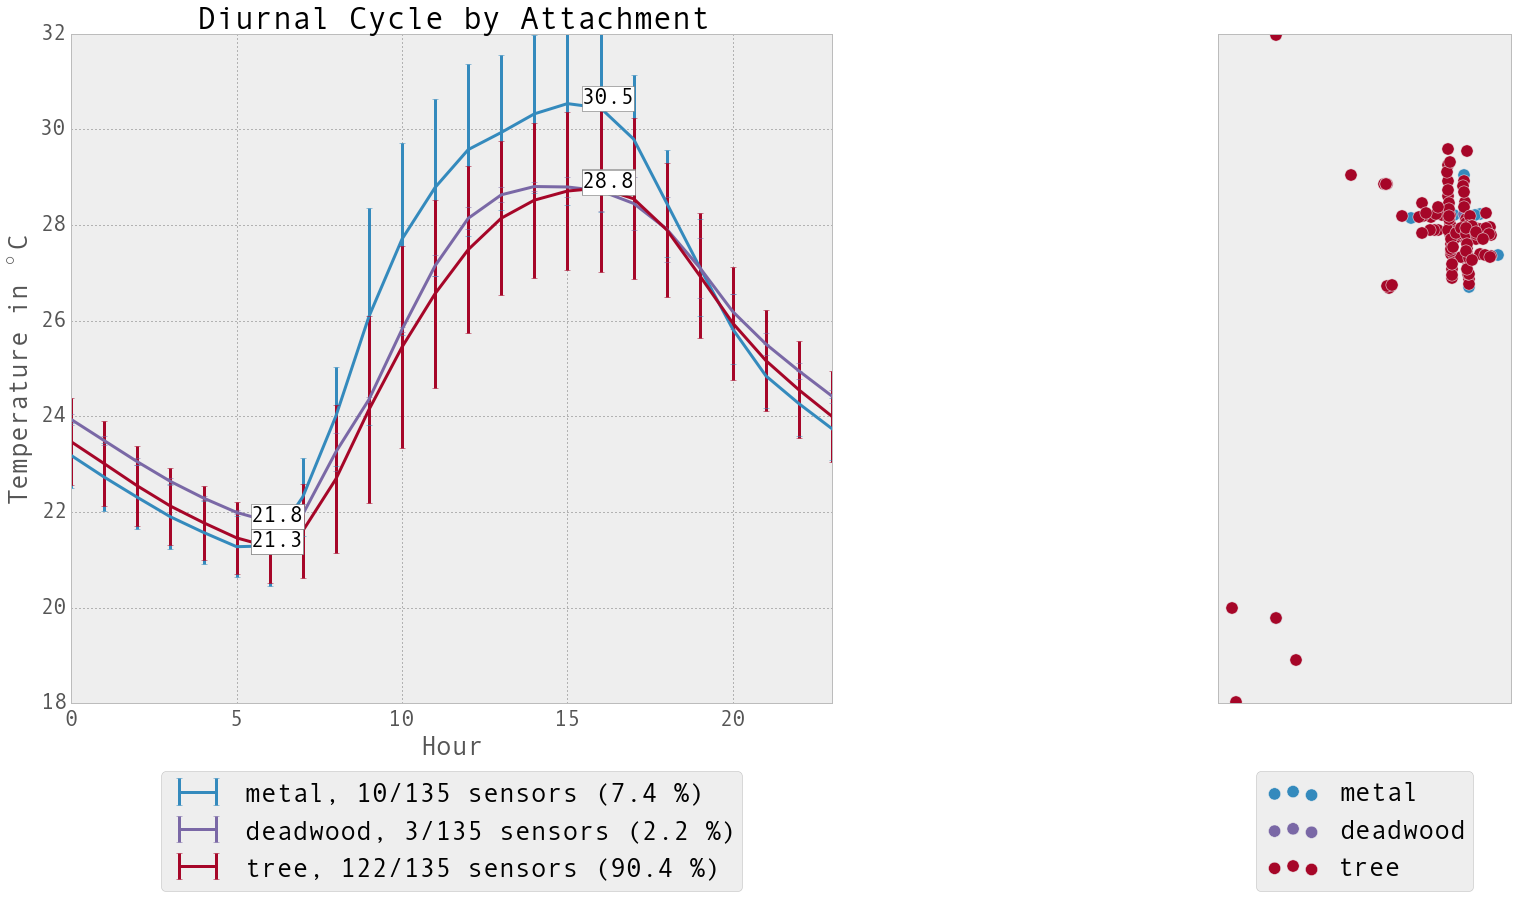

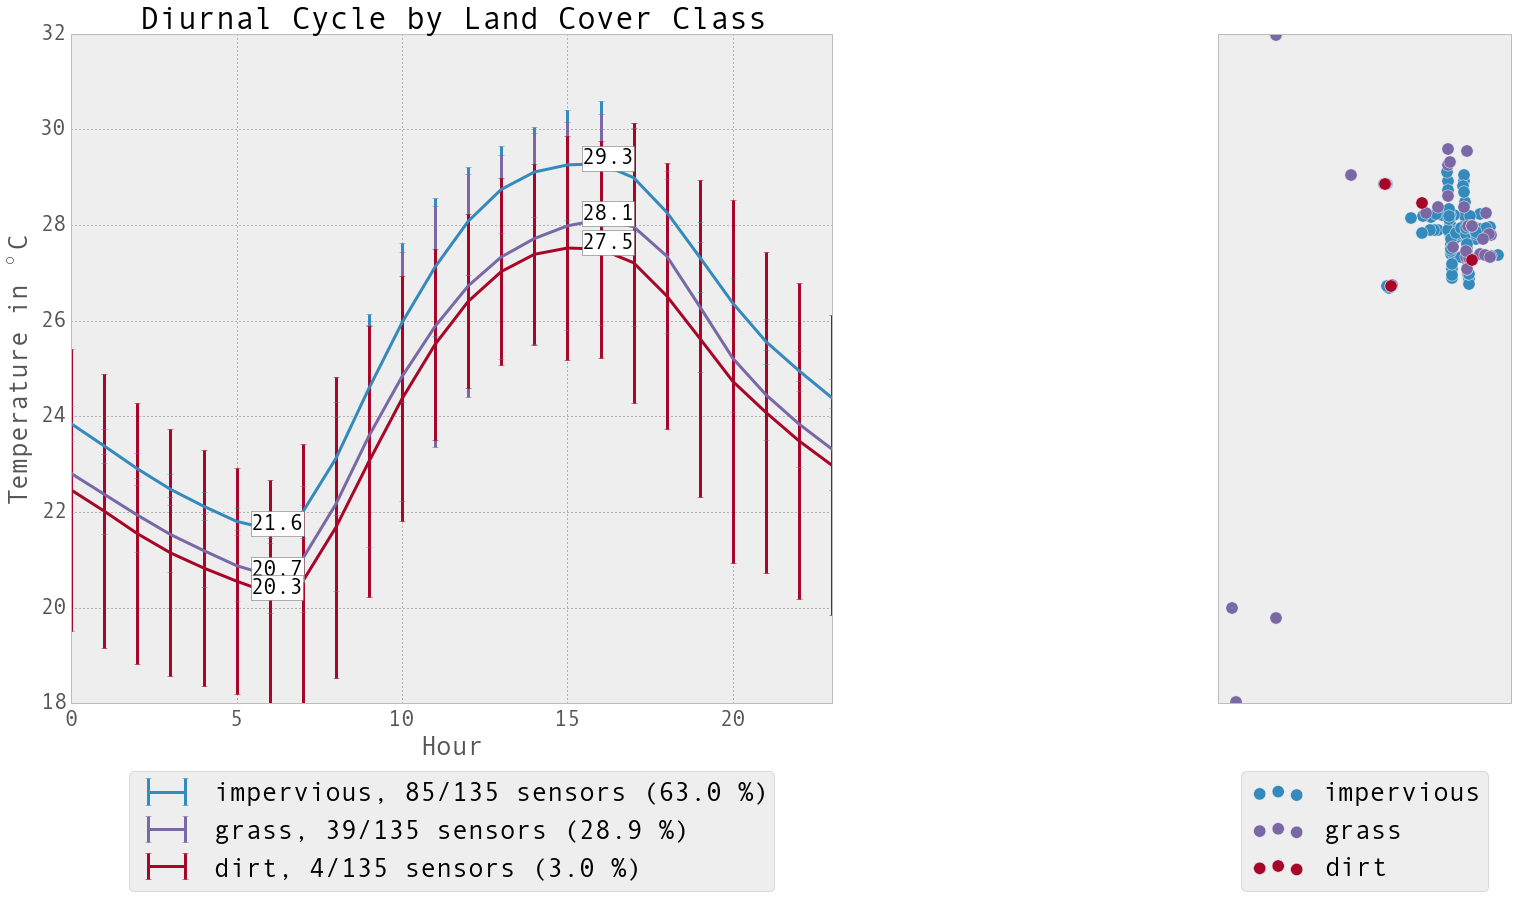

skipping plot Diurnal Cycle by Land Cover Class for sun
skipping plot Diurnal Cycle by Land Cover Class for sun


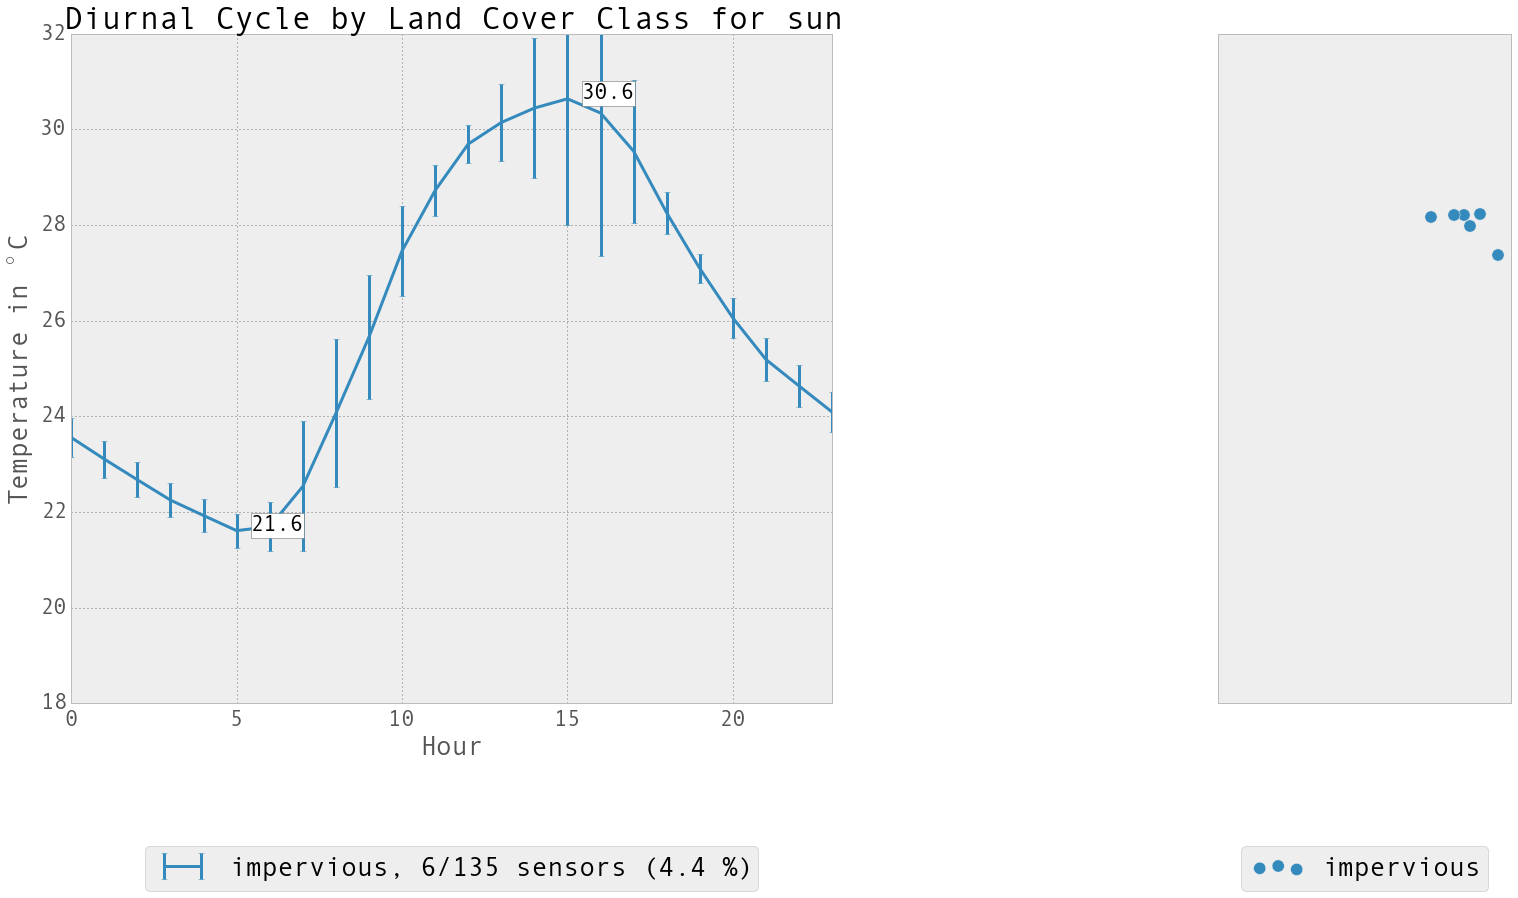

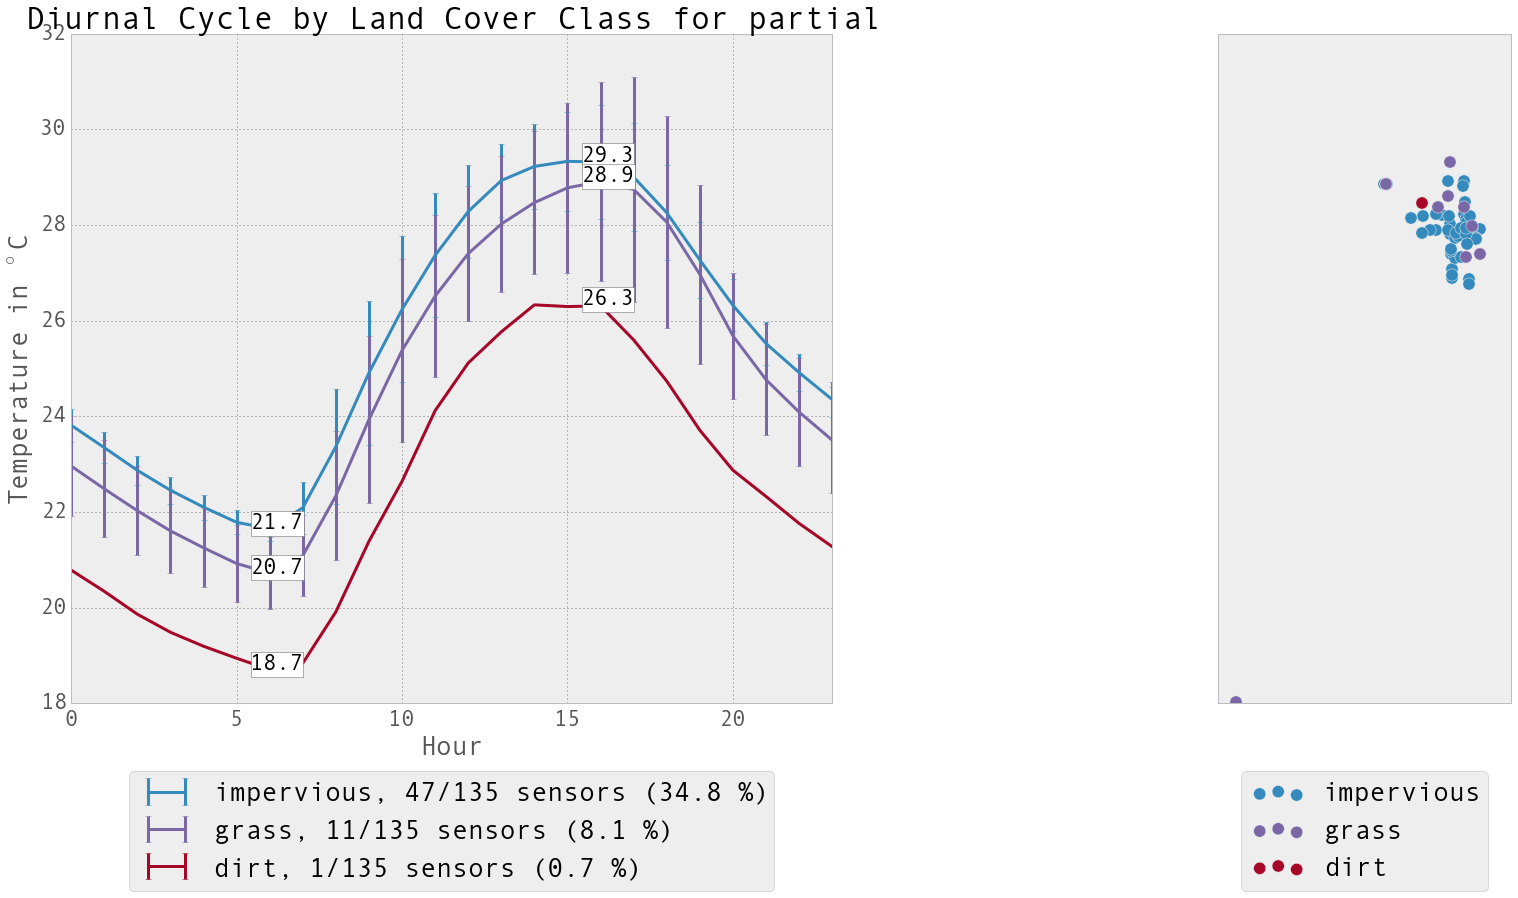

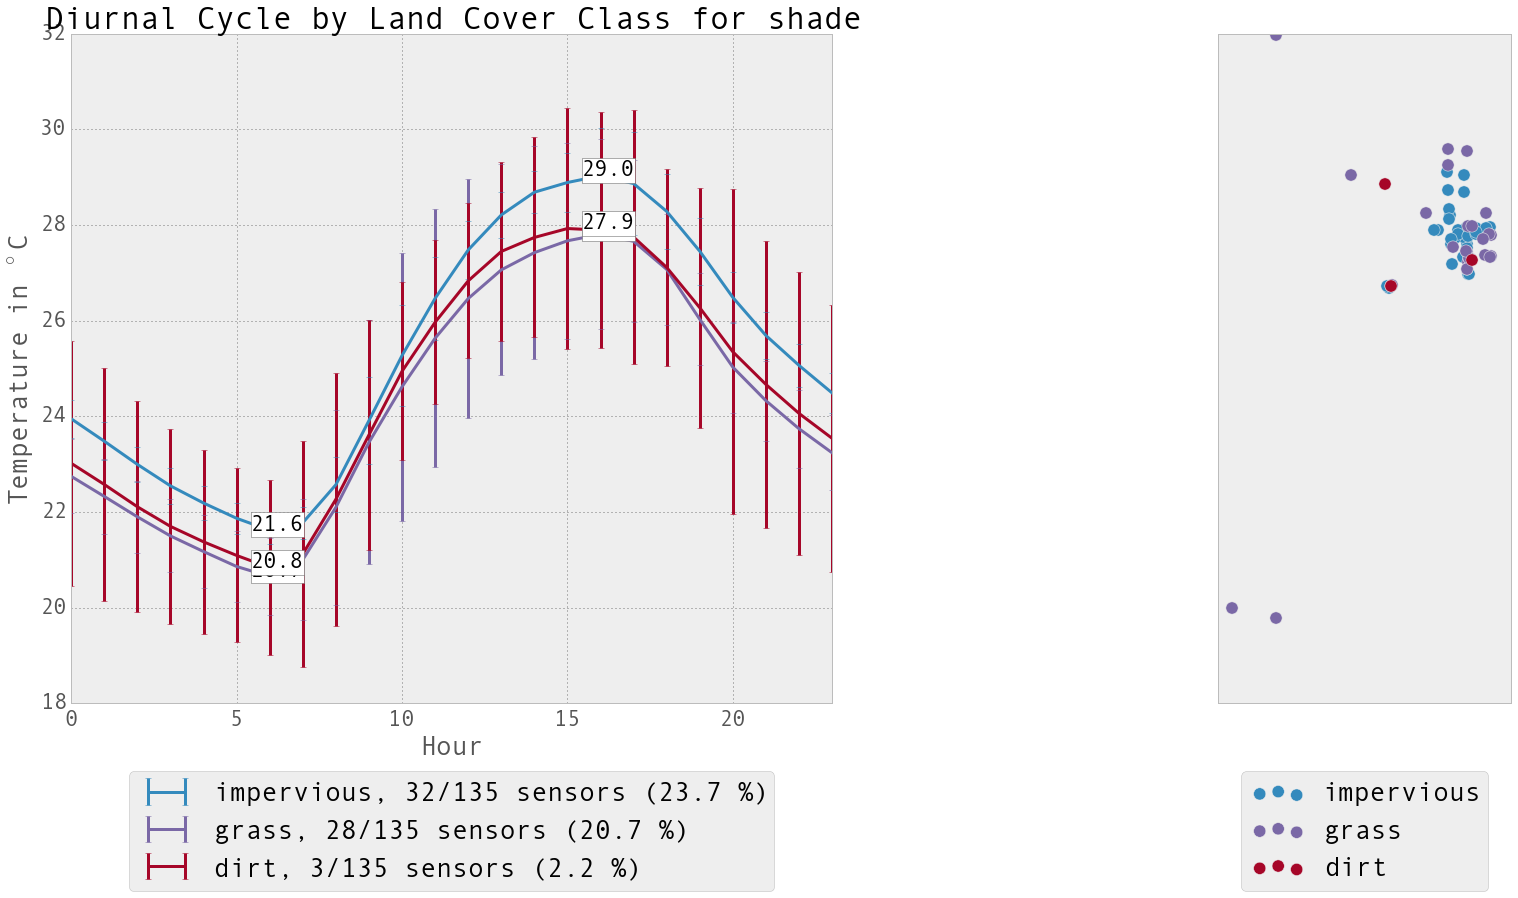

In [127]:
diurnalDF =  tempDF
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")
diurnalDF.groupby("hour").mean().plot()
plt.title('Diurnal Cycle by sensor number')
plt.ylabel('Anomaly Temperature in $^\circ $C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)

for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.diurnalplots(diurnalDF,meta, option)
for option2 in {'shade', 'partial', 'sun'} : 
    ibuttonplots.diurnalplots(diurnalDF,meta, 'landcoverclass', 'sunorshade', option2)

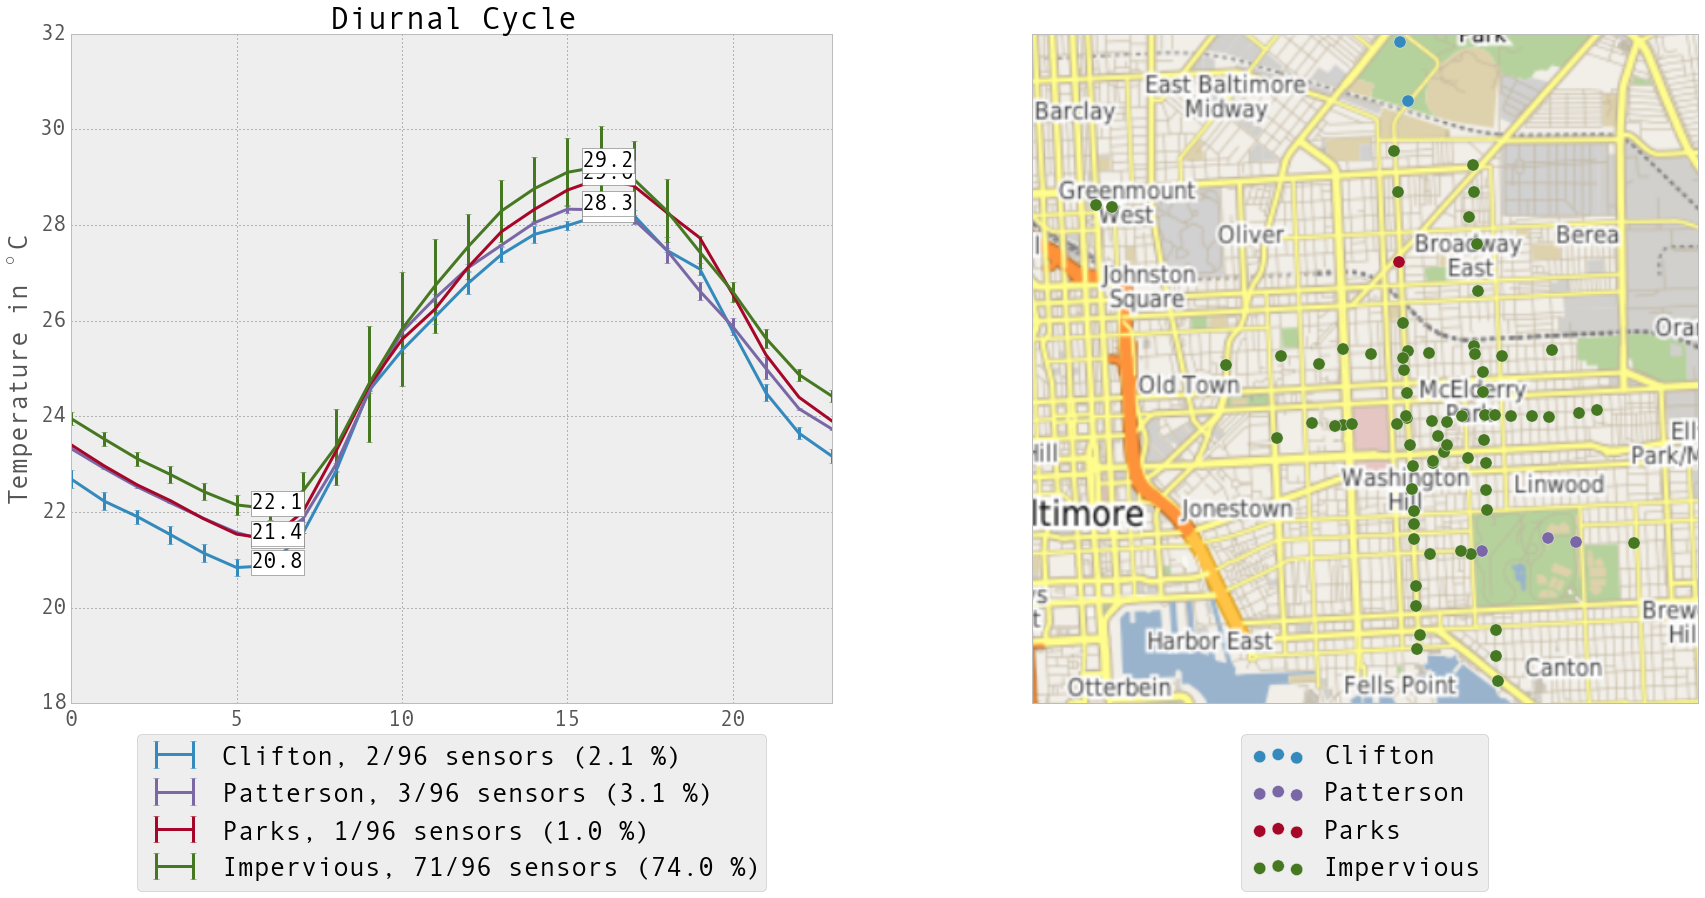

In [74]:
diurnalDF =  tempDF
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")

pattsensors = [52, 65, 119] #[9,11, 52, 30, 40, 119, 65, 14] # offset: 40, missing: 6
cliftonsensors = [74, 115] # missing 39, 83, flipped 37
greensensors = meta['sensornumber'].values[np.where(meta['landcoverclass']=='grass')]
#pocketparks = np.setdiff1d(np.setdiff1d(greensensors, pattsensors), cliftonsensors) # find all the sensors in 'green' space not in big parks
# note that sensor 125, Bocek park, isn't a pocket park
pocketparks = [ 73] #12 flipped

parks = {'Patterson': np.array(pattsensors), 
         'Clifton': np.array(cliftonsensors), 
         'Parks': np.array(pocketparks), 
         'Impervious': meta['sensornumber'].values[np.where(meta['landcoverclass']=='impervious')].astype(int) # sensor numbers which were in impervious

}
filename = './plots/diurnalparks%s.eps'%(parks.keys())


ibuttonplots.diurnalplotsgeneral(diurnalDF,meta,  parks, filename)

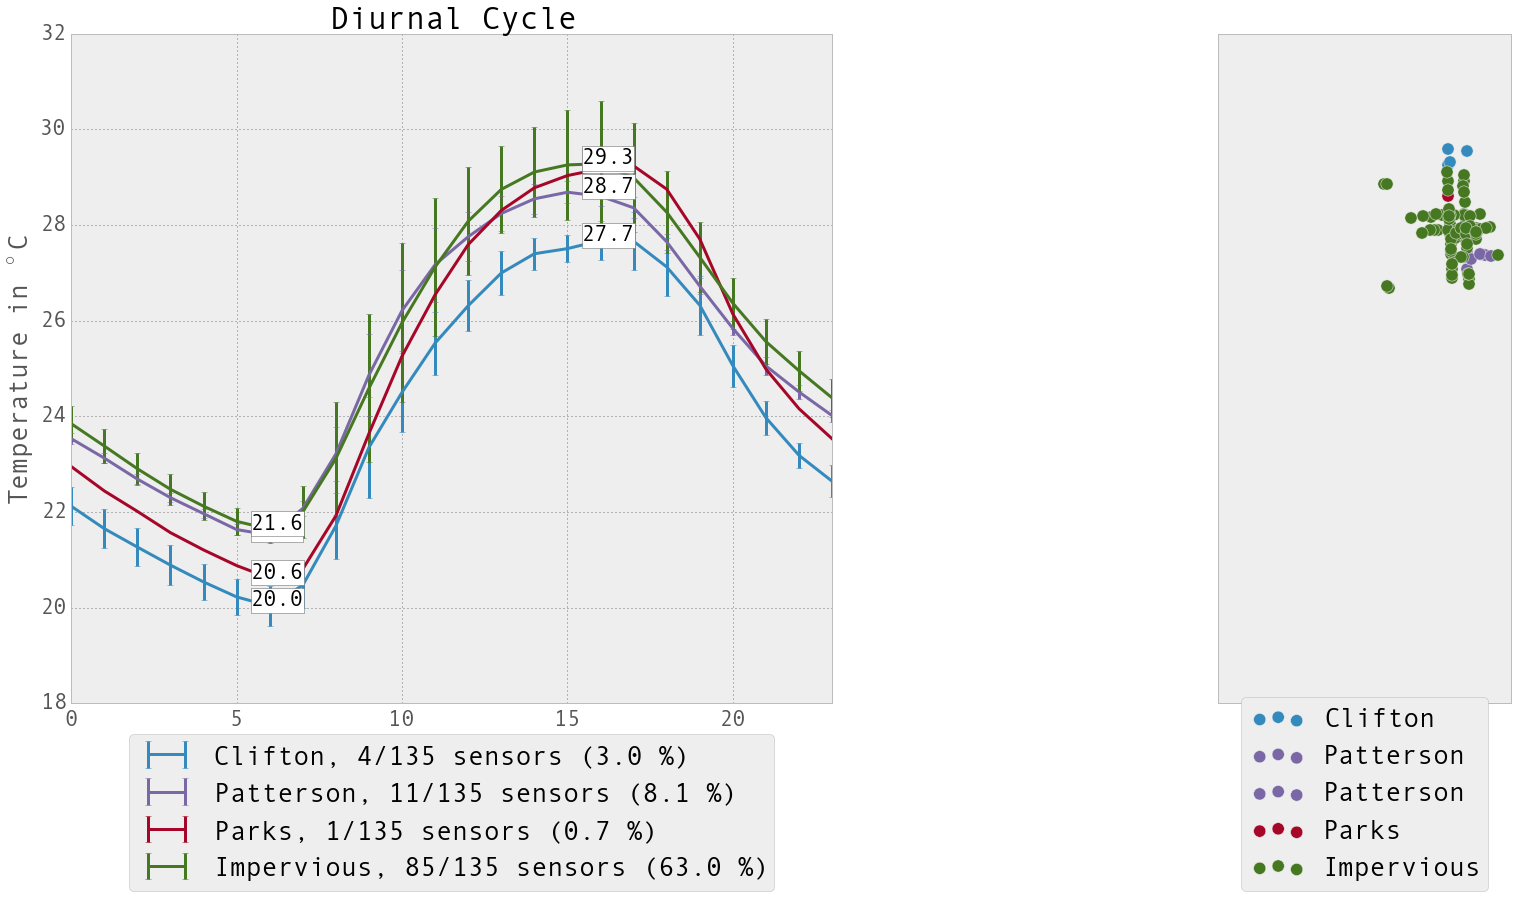

In [129]:
diurnalDF =  tempDF
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")

pattsensors = [52, 65, 119, 9,11, 52, 30, 40, 119, 65, 14] # offset: 40, missing: 6

cliftonsensors = [83, 74, 115, 37] # missing 39, 83, flipped 37
greensensors = meta['sensornumber'].values[np.where(meta['landcoverclass']=='grass')]
#pocketparks = np.setdiff1d(np.setdiff1d(greensensors, pattsensors), cliftonsensors) # find all the sensors in 'green' space not in big parks
# note that sensor 125, Bocek park, isn't a pocket park
pocketparks = [ 73] #12 flipped

parks = {'Patterson': np.array(pattsensors), 
         'Clifton': np.array(cliftonsensors), 
         'Parks': np.array(pocketparks), 
         'Impervious': meta['sensornumber'].values[np.where(meta['landcoverclass']=='impervious')].astype(int) # sensor numbers which were in impervious

}
filename = './plots/diurnalparks%s.eps'%(parks.keys())


ibuttonplots.diurnalplotsgeneral(diurnalDF,meta,  parks, filename)

In [7]:
reload(ibuttonplots)

<module 'ibuttonplots' from 'ibuttonplots.py'>

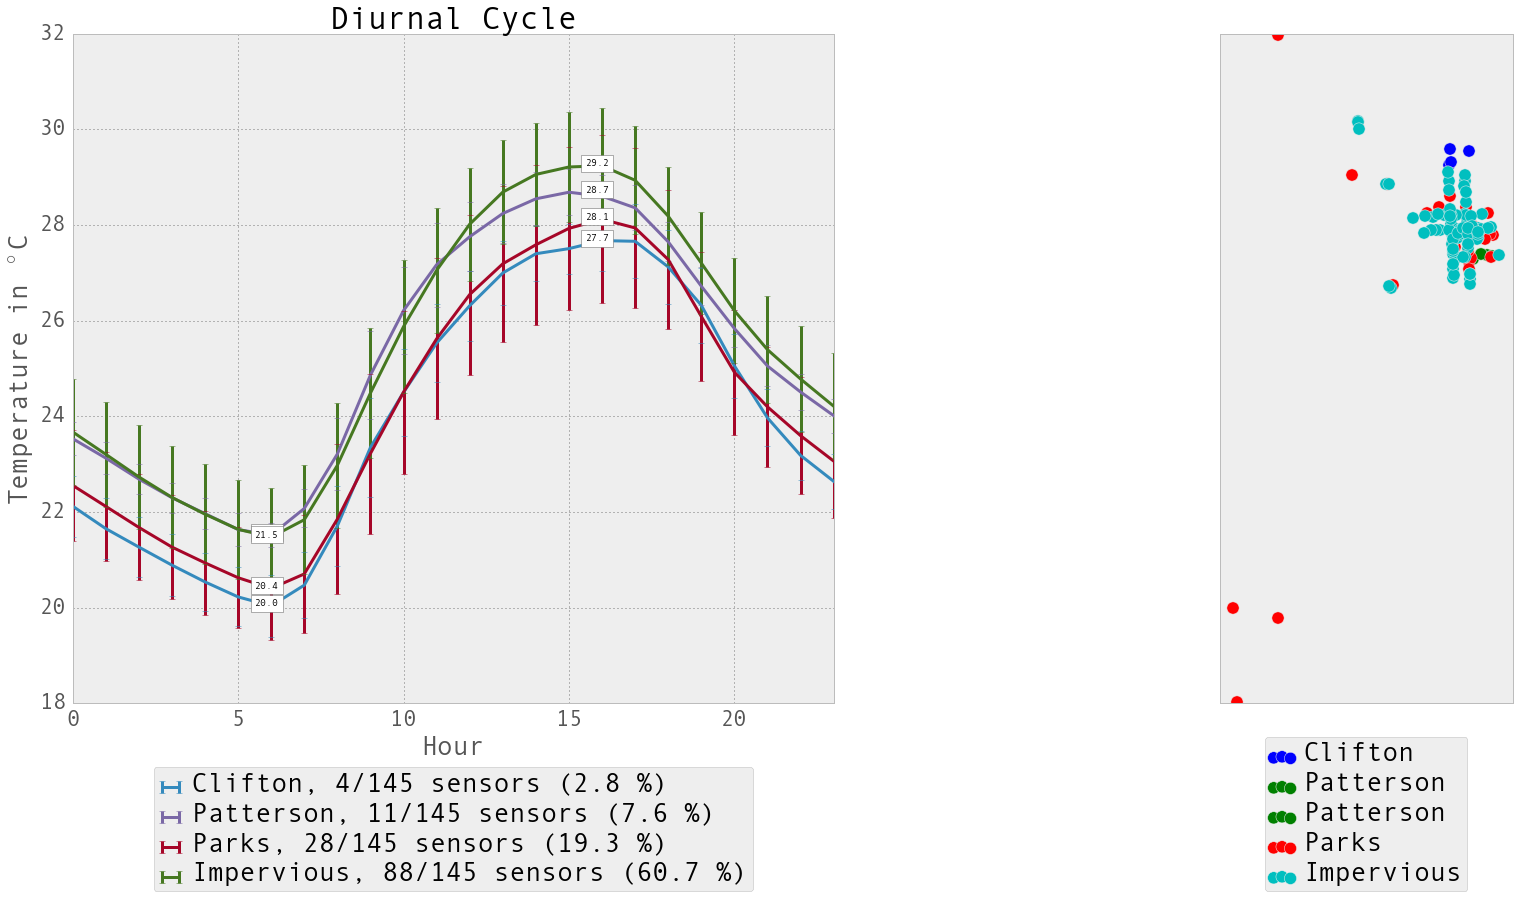

In [8]:
diurnalDF =  tempDF
diurnalDF["hour"] = tempDF.index.hour
diurnalDF.set_index("hour")

pattsensors = [52, 65, 119, 9,11, 52, 30, 40, 119, 65, 14] # offset: 40, missing: 6

cliftonsensors = [83, 74, 115, 37] # missing 39, 83, flipped 37
greensensors = meta['sensornumber'].values[np.where(meta['landcoverclass']=='grass')]
pocketparks = np.setdiff1d(np.setdiff1d(greensensors, pattsensors), cliftonsensors) # find all the sensors in 'green' space not in big parks
# note that sensor 125, Bocek park, isn't a pocket park
#pocketparks = [ 73] #12 flipped

parks = {'Patterson': np.array(pattsensors), 
         'Clifton': np.array(cliftonsensors), 
         'Parks': np.array(pocketparks), 
         'Impervious': meta['sensornumber'].values[np.where(meta['landcoverclass']=='impervious')].astype(int) # sensor numbers which were in impervious

}
filename = './plots/diurnalparks%s.eps'%(parks.keys())

ibuttonplots.diurnalplotsgeneral(tempDF,meta,  parks, filename)

In [12]:
parks['Parks']

array([  2,   6,   8,  12,  20,  31,  33,  34,  73,  91, 105, 111, 125,
       131, 133, 135, 137, 140, 173, 174, 175, 176, 177, 180, 183, 185,
       187, 188])